This was a short project that allowed me to further experience data analysis within python. I chose to crerate this visualisation using sports data because it's something i am interested in, so it meant the learning experience was more engaging. 

I took data from UnderStat on all the shot actions from Erling Haaland during the 2022-2023 season to produce a visualisation that truly illustrated the strikers attacking contrirbution during that season. Before Joining Manchester City, Haaland was a more expansive striker that scored a variety of goals. My thought was that in the system of Manchester city, his role has been more restricted, with shot actions that were now extremely close to the opposition goal. This is because the system of the club he just joined required him to quite simply apply the final touch to the attacking combinations Manchester city create. 

My thoughts are shown by the distribution of the players shots and how close they are to the opposition goal. There is a very strong cluster in a rectangular space, starting from the width of the keepers goal through to 'D' on the 18 yard box. The quality shots/chances are significantly less outside of this area. Creating a map of the players averge position during this season as well as the teams passing networks could help validate this point. 


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [15]:
df = pd.read_csv('/Users/donaldokorejior/documents/erling_haaland_2022_understat.csv')

In [21]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,93.599998,50.299999,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,88.500000,50.000000,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,86.400002,40.500000,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,95.300003,55.200001,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,89.400002,71.000000,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [19]:
df['X'] = df['X'] * 100 
df['Y'] = df['Y'] * 100 

In [29]:
total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()

In [70]:
actual_average_distance

11.720000401938833

In [72]:
background_colour = '#0C0D0E'

In [74]:
import matplotlib.font_manager as font_manager

font_path = '/Users/donaldokorejior/documents/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

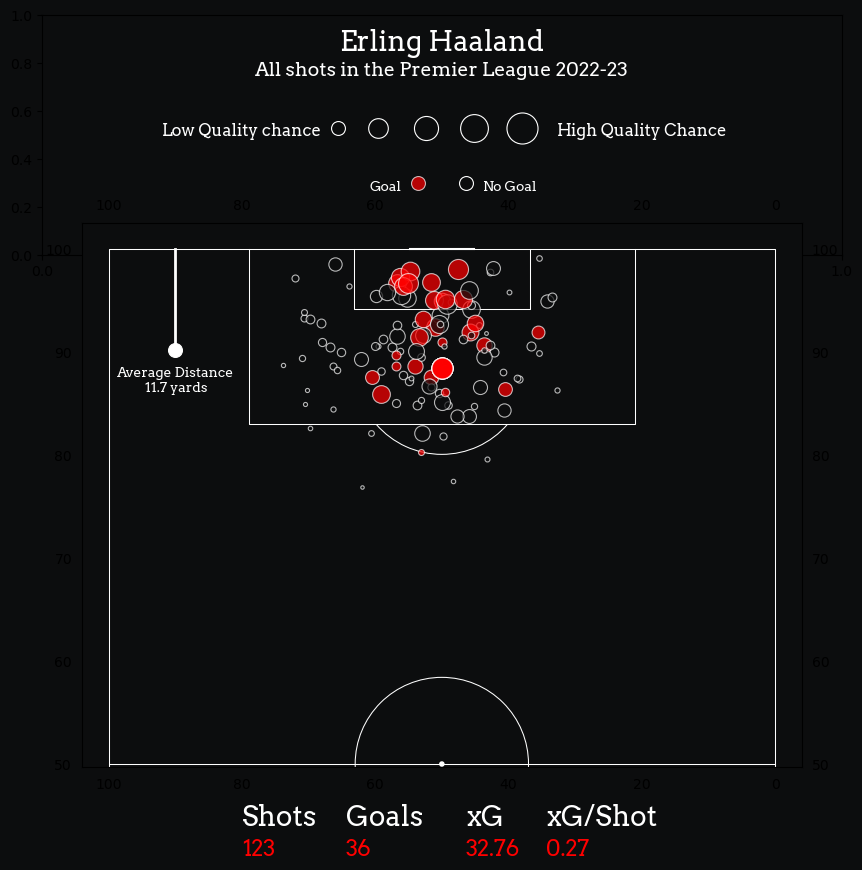

In [147]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_colour)

ax1 = fig.add_axes([0, .7, 1, .2])
ax1.set_facecolor(background_colour)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)


ax1.text(
    x=.5,
    y=.85,
    s='Erling Haaland',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax1.text(
    x=.5,
    y=.75,
    s='All shots in the Premier League 2022-23',
    fontsize=14,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax1.text(
    x=.25,
    y=.5,
    s='Low Quality chance',
    fontsize=12,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax1.scatter(
    x=.37,
    y=.53,
    s=100,
    color=background_colour,
    edgecolor='white',
    linewidth=.8
)

ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_colour, 
    edgecolor='white', 
    linewidth=.8
)

ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_colour, 
    edgecolor='white', 
    linewidth=.8
)

ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_colour, 
    edgecolor='white', 
    linewidth=.8
)

ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_colour, 
    edgecolor='white', 
    linewidth=.8
)
    
ax1.text(
    x=.75,
    y=.5,
    s='High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)


ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_colour, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)




ax2 = fig.add_axes([.05, .25, .9, .5])
ax2.set_facecolor(background_colour)

pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_colour,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True,
    label=True
)
 
pitch.draw(ax=ax2)

ax2.scatter(x=90, y=points_average_distance,
            s=100, color='white', linewidth=.8)

ax2.plot([90,90], [100, points_average_distance], color='white', linewidth=2)

ax2.text(
    x=90, y=points_average_distance -4,
    s=f'Average Distance\n{actual_average_distance: .1f} yards',
    fontsize=10, fontproperties=font_props,
    color='white', ha='center')

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], 
        color='red' if x['result'] == 'Goal' else background_colour, 
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )

ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_colour)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25, 
    y=.5, 
    s='Shots', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.25, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=.5, 
    s='Goals', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.38, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=.5, 
    s='xG', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=.5, 
    s='xG/Shot', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='red', 
    ha='left'
)

ax3.set_axis_off()

